<a href="https://colab.research.google.com/github/risker93/Hello_World/blob/main/15_MNIST_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils #원핫 인코딩을 하기위해서
from keras.models import Sequential #레이어를 쌓기위해서
from keras.layers import Dense #덴스 레이어를 쌓을거임
from keras.callbacks import ModelCheckpoint,EarlyStopping #조기종료


import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf


In [2]:

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)


In [3]:

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

#범주화 데이터로 변환(onehot encoding)
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)


11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#반드시 기억 하세요!

# 모델 프레임 설정
#시퀀셜을 이용해서 순차적으로 쌓겠다.
model = Sequential()

#맨앞에 숫자는 노드의 숫자, 784개가 인풋, 인풋을 받아서 relu로 보내주겠다.
#처음에만 인풋을 받기 때문에 명시해줌.
model.add(Dense(512, input_dim=784, activation='relu'))

#아웃풋은 10개 , 소프트 맥스로
model.add(Dense(10, activation='softmax'))


In [6]:
# 모델 실행 환경 설정
#손실함수는 categorical_crossentropy(범주화 분류)를 사용하겠다. 
#최적화는 아담을 쓰겠다.
#측정치는 정확성으로 하겠다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [9]:

# 모델 최적화 설정
#모델이라는 폴더를 만들겠다.
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

#패스를 설정해줌.
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
#체크포인트를 사용해서 좋은 모델만 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
#monitor 값으로 보는 값이 patience 설정값 동안 안변하면, 즉 성능이 안좋아지면 그만해라. 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [10]:
# 모델의 실행
#validation_data <검증용 데이터
#배치 사이즈는 300
#얼리스타핑 콜백과 체크포인터를  콜백에 저장 한다.
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])



Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model/01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10208, saving model to ./model/02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10208 to 0.08898, saving model to ./model/03-0.0890.hdf5

Epoch 00004: val_loss improved from 0.08898 to 0.07866, saving model to ./model/04-0.0787.hdf5

Epoch 00005: val_loss improved from 0.07866 to 0.07373, saving model to ./model/05-0.0737.hdf5

Epoch 00006: val_loss improved from 0.07373 to 0.06731, saving model to ./model/06-0.0673.hdf5

Epoch 00007: val_loss improved from 0.06731 to 0.06465, saving model to ./model/07-0.0646.hdf5

Epoch 00008: val_loss improved from 0.06465 to 0.06357, saving model to ./model/08-0.0636.hdf5

Epoch 00009: val_loss improved from 0.06357 to 0.06278, saving model to ./model/09-0.0628.hdf5

Epoch 00010: val_loss improved from 0.06278 to 0.06218, saving model to ./model/10-0.0622.hdf5

Epoch 00011: val_loss did not improve from 

In [11]:

# 테스트 정확도 출력

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


313/313 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.9826

 Test Accuracy: 0.9826


In [12]:

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']


In [13]:
print(y_vloss)
print()
print(y_loss)

[0.14745669066905975, 0.10208182036876678, 0.0889761745929718, 0.07866081595420837, 0.07372918725013733, 0.06731288135051727, 0.06464916467666626, 0.06357352435588837, 0.06277860701084137, 0.06218043342232704, 0.06481374800205231, 0.07174372673034668, 0.06016618758440018, 0.06573091447353363, 0.06970524787902832, 0.07301905006170273, 0.06643486768007278, 0.06430111825466156, 0.06681877374649048, 0.06503049284219742, 0.06660301983356476, 0.06623560190200806, 0.06654177606105804]

[0.3026984930038452, 0.12376447021961212, 0.08126205205917358, 0.06018107756972313, 0.04500582441687584, 0.03471934050321579, 0.026637090370059013, 0.021283822134137154, 0.015626074746251106, 0.01167335920035839, 0.010006249882280827, 0.007714083883911371, 0.0058206175453960896, 0.004436979070305824, 0.004199041053652763, 0.003821162274107337, 0.003698719432577491, 0.001631776336580515, 0.0012123696506023407, 0.001092600403353572, 0.0005849595181643963, 0.0005456501385197043, 0.0004095355689059943]


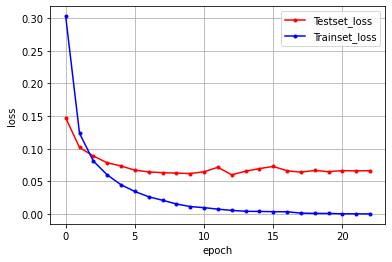

In [14]:

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
#legend는 범례
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


학습 셋은 거의 0에 가깝게 나온다.

더이상 학습되지 않아서 조기 종료를 했다.

다행히도 학습을 더 많이 해도 과적합이 일어나지 않았다. 

상당히 결과값이 좋게 나온 예제 데이터이다.
